In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Load data

In [ ]:
(train_data,train_labels),(test_data,test_labels)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#check shape and type and dtype

In [ ]:
train_data.shape, train_data.dtype, type(train_data)

((60000, 28, 28), dtype('uint8'), numpy.ndarray)

In [ ]:
train_labels.shape, train_labels.dtype, type(train_labels)

((60000,), dtype('uint8'), numpy.ndarray)

In [ ]:
test_data.shape, test_data.dtype, type(test_data)

((10000, 28, 28), dtype('uint8'), numpy.ndarray)

In [ ]:
test_labels.shape, test_labels.dtype, type(test_labels)

((10000,), dtype('uint8'), numpy.ndarray)

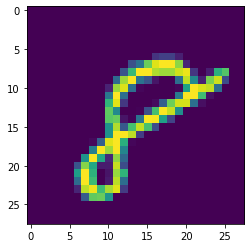

In [ ]:
plt.imshow(train_data[-1])

In [ ]:
train_labels[-1]

8

#reshape 

In [ ]:
train_data = np.reshape(train_data, (-1, 28*28))
train_labels = np.reshape(train_labels, (-1, 1))

train_data.shape, train_labels.shape

((60000, 784), (60000, 1))

In [ ]:
test_data = np.reshape(test_data,(-1, 28*28 ))
test_labels = np.reshape(test_labels, (-1, 1))

test_data.shape, test_labels.shape

((10000, 784), (10000, 1))

#Convert labels to one hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

**to_categorical converts labels type to float32**

In [ ]:
train_labels = to_categorical(train_labels, num_classes=10, dtype='float32')

In [ ]:
test_labels = to_categorical(test_labels, num_classes=10, dtype='float32')

**check one hot encoding**

In [ ]:
train_labels[-1] 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

#Normalize

**normalize between 0, 1 and float32 dtype**

In [ ]:
train_data.min(),train_data.max(),train_data.dtype

(0, 255, dtype('uint8'))

In [ ]:
train_data = train_data.astype(np.float32)/255

In [ ]:
train_data.min(),train_data.max(),train_data.dtype

(0.0, 1.0, dtype('float32'))

In [ ]:
test_data = test_data.astype(np.float32)/255

In [ ]:
test_data.min(), test_data.max(), test_data.dtype

(0.0, 1.0, dtype('float32'))

#Create Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout

In [ ]:
Input_layer = Input(shape=(784,))
x = Dense(units=512,activation='relu')(Input_layer)
x = Dense(units=256,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=128,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=64,activation='relu')(x)
x = Dropout(0.3)(x)
prediction = Dense(units=10, activation='softmax')(x)

classification_model = Model(inputs = Input_layer,outputs = prediction)

In [ ]:
classification_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256

#Compile model and Early stopping


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
classification_model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

#Fit model

In [ ]:
classification_model.fit(x=train_data,y=train_labels,batch_size=32, epochs = 40, verbose=1,
                         validation_split=0.2,callbacks=[early_stop])

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6210 - accuracy: 0.8053 - val_loss: 0.1314 - val_accuracy: 0.9623
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1558 - accuracy: 0.9580 - val_loss: 0.1193 - val_accuracy: 0.9672
Epoch 3/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1108 - accuracy: 0.9701 - val_loss: 0.1176 - val_accuracy: 0.9686
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0854 - accuracy: 0.9780 - val_loss: 0.1039 - val_accuracy: 0.9722
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.9812 - val_loss: 0.1071 - val_accuracy: 0.9753
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0559 - accuracy: 0.9844 - val_loss: 0.1105 - val_accuracy: 0.9737
Epoch 7/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0485 - accuracy: 0.9873 - val_loss: 0.1217 - val_accuracy:

#Evaluate model

**model history**

In [ ]:
model_history_loss = pd.DataFrame({'loss':classification_model.history.history['loss'],
                                   'val_loss':classification_model.history.history['val_loss']})
model_history_acc = pd.DataFrame({'accuracy':classification_model.history.history['accuracy'],
                                  'val_accuracy':classification_model.history.history['val_accuracy']})

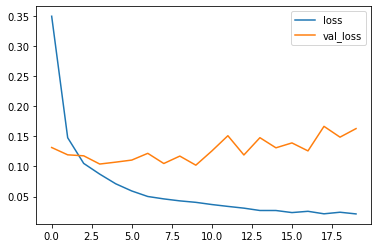

In [ ]:
model_history_loss.plot()

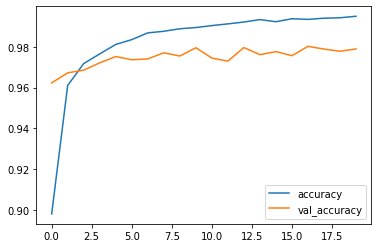

In [ ]:
model_history_acc.plot()

**Evaluate**

In [ ]:
max(classification_model.history.history['val_accuracy'])

0.9802500009536743

In [ ]:
classification_model.evaluate(x= test_data, y= test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9819


[0.0804930180311203, 0.9818999767303467]